In [11]:
import matplotlib.pyplot as plt
import numpy as np

class NonStationary_Environment():
    def __init__(self,NumArm=10,mean=0,std_dev=0.01):
        self.NumArm=NumArm
        self.arms=np.arange(NumArm)
        self.mean=mean
        self.stddev=std_dev
        self.q_true=np.full(NumArm,(1/NumArm))
        self.greedy_choices=np.random.choice(np.flatnonzero(self.q_true==(1/NumArm)))
    def reward(self,action_picked):
        self.q_true=self.q_true+np.random.normal(0,scale=self.stddev,size=self.NumArm)
        Max_q_true=max(self.q_true)
        self.optimalChoice=np.random.choice(np.flatnonzero(self.q_true==Max_q_true))
        return np.random.normal(self.q_true[action_picked],scale=1.0)
    def reset(self):
        self.q_true=np.full(self.NumArm,(1/self.NumArm))
        self.optimalChoice=np.random.choice(np.flatnonzero(self.q_true==(1/self.NumArm)))

class Stationary_Environment():
    def __init__(self,NumArm=10,mean=0,std_dev=1):
        self.arms=np.arange(NumArm)
        self.NumArm=NumArm
        self.mean=mean
        self.stddev=std_dev
        self.q_true=np.random.normal(mean, std_dev, NumArm)
        Max_q_true=max(self.q_true)
        self.optimalChoice=np.random.choice(np.flatnonzero(self.q_true==Max_q_true))            
    def reward(self, chosen):
        return np.random.normal(self.q_true[chosen],scale=1)
    def reset(self):
        self.q_true=np.random.normal(0,scale=self.stddev,size=self.NumArm)
        Max_q_true=max(self.q_true)
        self.optimalChoice=np.random.choice(np.flatnonzero(self.q_true==Max_q_true))

def start(runs,time,agents,env):   
        numOfAgents=len(agents)
        RD=np.zeros((numOfAgents, time, runs))
        Optimal_data=np.zeros((numOfAgents, time, runs))
        for r in range(runs):
            for t in range(time):
                for a in range(numOfAgents):
                    choosen=agents[a].selectArm()
                    reward=env.reward(choosen)
                    agents[a].update(choosen,reward)
                    RD[a][t][r]=RD[a][t][r]+reward
                    if env.optimalChoice==choosen:
                        Optimal_data[a][t][r]=Optimal_data[a][t][r]+1
            env.reset()
            for a in range(numOfAgents):
                agents[a].reset()
        AverageReward=np.mean(RD, axis=2)
        AverageOptimality=np.mean(Optimal_data, axis=2)
        return AverageReward,AverageOptimality
    
class Agent():
    def __init__(self,NumArm,epsilon=0,alpha=0,Optimised_initial=0,uncertainity_factor=0):
        self.NumArm=NumArm
        self.epsilon=epsilon 
        self.alpha=alpha
        self.time=0 
        self.ActionFreq=np.zeros(NumArm) 
        self.q_estimated=np.zeros(NumArm) 
        self.choice=np.arange(NumArm) 
        self.Optimised_initial=Optimised_initial
        self.uncertainity_factor=uncertainity_factor 
        self.q_estimated.fill(Optimised_initial)
    def selectArm(self):
        self.time=self.time+1
        if self.uncertainity_factor!=0:
            var=np.sqrt(np.log(self.time)/self.ActionFreq)
            ubc=self.q_estimated+self.uncertainity_factor*var
            return np.argmax(ubc)
        else:
            if np.random.rand()<self.epsilon: 
                return np.random.choice(self.choice)
            vMax = max(self.q_estimated)
            return np.random.choice(np.flatnonzero(self.q_estimated == vMax)) 
    def update(self,i,reward):
            self.ActionFreq[i]+=1
            count=self.ActionFreq[i]
            value=self.q_estimated[i]
            step_size=self.alpha
            diff=reward-value
            if self.alpha==0:
                step_size=(1/count)
            self.q_estimated[i]=value+(step_size)*(diff)
    def reset(self):
        self.ActionFreq.fill(0)
        self.time = 0
        self.q_estimated.fill(self.Optimised_initial)


In [2]:
def plotResults(agents,time,Mean_Reward,Mean_Optimality):
    for a in range(len(agents)):
        plt.plot(np.array(list(range(time))),Mean_Optimality[a],label="Agent "+str(a))
        plt.ylabel('Optimal Action %')
    plt.legend()
    plt.show()
    for a in range(len(agents)):
        plt.plot(np.array(list(range(time))),Mean_Reward[a],label="Agent "+str(a))
        plt.ylabel('Average Reward')
        plt.xlabel('Time')
    plt.legend()
    plt.show()

In [3]:
def Question_1():
    NoOfArm=10
    std_dev=0.01
    Epsilon=0.1
    NumberOfSteps=10000
    env = NonStationary_Environment(NumArm=NoOfArm,mean=0,std_dev=std_dev)
    agents = [Agent(NoOfArm,epsilon=Epsilon,alpha=0),Agent(NoOfArm, alpha=0.1, epsilon=Epsilon)]
    runs=2000
    time=NumberOfSteps
    x,y=start(runs,time,agents,env)
    plotResults(agents,time,x,y)

In [12]:
def Question_2():
    runs =2000
    NoOfArm=10 
    std_dev=0.01
    time=10000
    #Stationary
    agents = [Agent(NoOfArm,epsilon=0,alpha=0.1,Optimised_initial=5),Agent(NoOfArm,epsilon=0.1,alpha=0.1)]
    env1 = Stationary_Environment()
    x,y=start(runs,time,agents,env1)
    plotResults(agents,time,x,y)
    #NonStationary
    agents = [Agent(NoOfArm,epsilon=0,alpha=0.1,Optimised_initial=5),Agent(NoOfArm,epsilon=0.1,alpha=0.1)]
    env2 = NonStationary_Environment()
    x,y=start(runs,time,agents,env2)
    plotResults(agents,time,x,y)


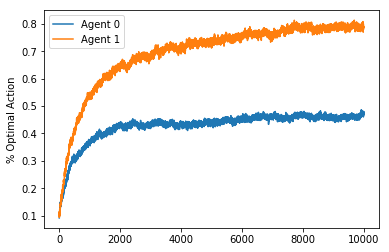

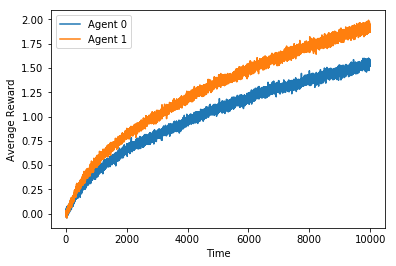

In [5]:
Question_1()

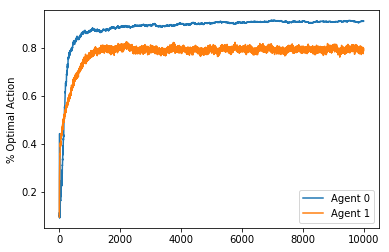

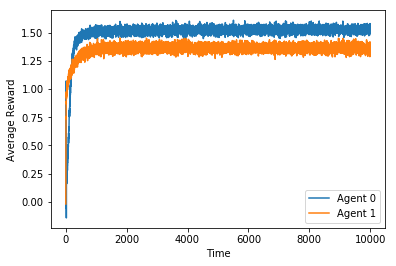

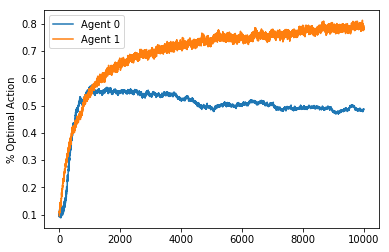

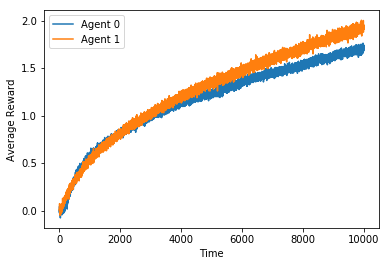

In [13]:
Question_2()

In [14]:
def Question_4():
    runs =2000
    NoOfArm=10 
    std_dev=0.01
    time=1000
    #Stationary
    agents = [Agent(NoOfArm,uncertainity_factor=2),Agent(NoOfArm,epsilon=0,alpha=0.1,Optimised_initial=5),Agent(NoOfArm,epsilon=0.1,alpha=0.1)]
    env1 = Stationary_Environment()
    x,y=start(runs,time,agents,env1)
    plotResults(agents,time,x,y)
    #NonStationary
    agents = [Agent(NoOfArm,uncertainity_factor=2),Agent(NoOfArm,epsilon=0,alpha=0.1,Optimised_initial=5),Agent(NoOfArm,epsilon=0.1,alpha=0.1)]
    env2 = NonStationary_Environment()
    x,y=start(runs,time,agents,env2)
    plotResults(agents,time,x,y)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:71: RuntimeWarning: divide by zero encountered in divide


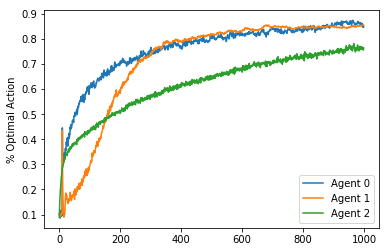

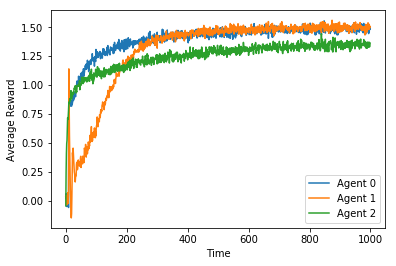

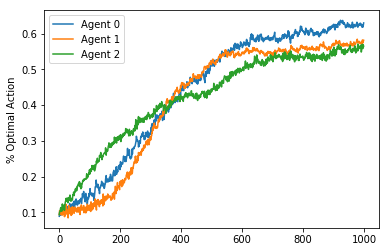

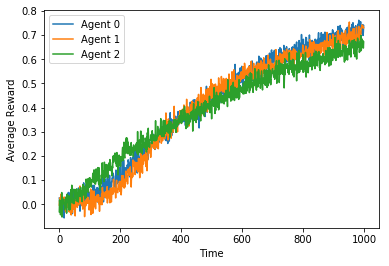

In [15]:
Question_4()